In [ ]:
# Plotting functions - feel free to skip this cell
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

import random
import numpy as np


# Helper function to plot datapoints and function approximators
def plot(X,Y,f=None,pt_legend='',line_legend='',title='', ylim=None):
    fig, ax = plt.subplots(figsize=(8,8))
    ln = None
    if Y:
        ln= ax.scatter(X,Y, color='blue', label=pt_legend)
    if f:
        ln = ax.plot(X,[f(x) for x in X], color='red', label=line_legend)[0]
    if pt_legend or line_legend:
        ax.legend()
    if ylim:
        ax.set_ylim(*ylim)
    return fig,ax,ln


# Utility code to animate SGD
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
Ys = []
X = []
model = None
fig, ax, ln = None, None, None
fig = None;

def updateY(): 
    Ys.append([float(model(x)) for x in X])

def initY():
    global Ys
    Ys = []
    updateY()
    
def animate(gif="", skips = 1):
    def update(frame):
        ln.set_data(X, Ys[frame])
        return ln,

    ani = FuncAnimation(fig, update, init_func = lambda: [ln], frames=range(0,len(Ys),skips), blit=True)
    if gif:
      ani.save(gif, writer='pillow', fps=15)
    return HTML(ani.to_jshtml())

In [ ]:
#!apt install imagemagick
#from IPython.display import clear_output
#clear_output() #remove this line if you need to debug installation issues

## Fitting a linear model to data

We generate the "ground truth" $a_{gt},b_{gt}$ at random in $[0,5]$ and generate $20$ samples of the form $x_i,y_i$ where $x_i$ is random in $[0,1]$ and $y_i = a_{gt}x_i + b_{gt} + \xi_i$ for noise $\xi_i$ random in $[0,1/2]$.

Ground truth: 4.12, 0.66


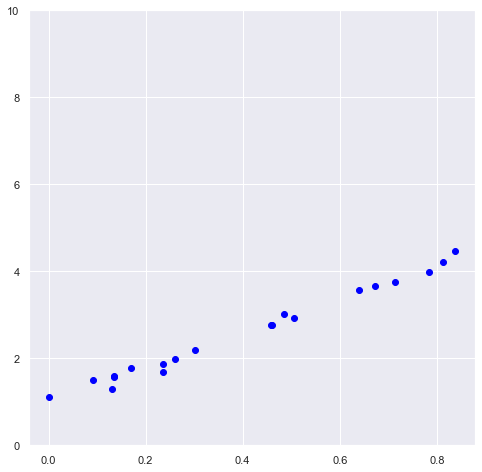

In [11]:
n = 20
a_gt , b_gt = 5*random.random(), 5*random.random()
X = [random.random() for i in range(20)]
Y = [a_gt*x + b_gt + 0.5*random.random() for x in X]
print(f"Ground truth: {a_gt:.2f}, {b_gt:.2f}")
fig, ax, ln = plot(X,Y, ylim=(0,10));

## Training loop:
For a random sample $(x,y)$, we compute the gradient $\nabla = \nabla (f(x)-y)^2$ (which is a vector in $\mathbb{R}^2$) and update $(a,b) \leftarrow (a,b) - \eta \cdot \nabla$

$$\nabla = \left( \tfrac{d\mathcal{L}}{da} , \tfrac{d\mathcal{L}}{db} \right)$$

If $f(x)= a\cdot x + b$ and $\mathcal{L}_{x,y}(f) = (f(x)-y)^2$  then

$\tfrac{d \mathcal{L}}{da} = 2\cdot(a\cdot x + b - y)\cdot x$ and $\tfrac{d \mathcal{L}}{db} = 2\cdot (a\cdot x + b - y)$

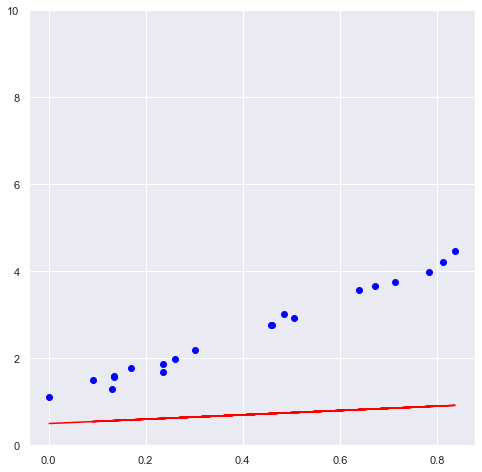

In [12]:
a = 0.5
b = 0.5
model = lambda x: a*x + b
fig, ax, ln = plot(X,Y, model, ylim=(0,10));

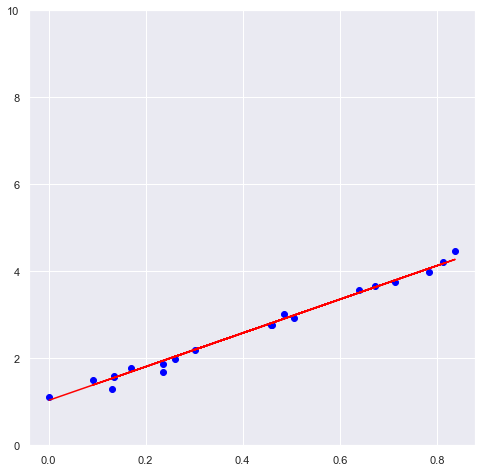

In [13]:
η = 0.03
epochs = 50
initY()
for t in range(epochs):
    for x,y in zip(X,Y):
        # loss = (a*x+b-y)^2 
        grad_a = 2*(a*x+b-y)*x
        grad_b = 2*(a*x+b-y)
        a,b =  a - η*grad_a  , b - η*grad_b
        updateY()

plot(X,Y, model, ylim=(0,10));

In [14]:
animate("regression.gif",10)